## Methods and Plan & Computational Code and Output (individual assignment 2)

*STAT 301- Manya Jain: 22206486 (Group 12)*

### 1.A Data Description
The dataset used is picked from Kaggle (https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash) and contains food delivery data from DoorDash. It contains information about restaurants with under 30 minutes of delivery time using the iconic place address in downtown for each populous city in Canada. The data was collected from Door Dash website (https://www.doordash.com/) with selenium on Python and this cleaned_full_data.csv was made on https://www.kaggle.com/code/satoshiss/clean-restaurant-raw-data?scriptVersionId=97393753 from the other raw files.

The iconinc place address in Downtown for each city used are as follows:
1. Toronto Rogers Center : 1 Blue Jays Way, Toronto, ON M5V 1J1
2. Montreal The Montreal Museum of Fine Arts :1380 Sherbrooke St W, Montreal, Quebec H3G 1J5
3. Calgary Calgary Tower: 101 9 Ave SW, Calgary, AB T2P 1J9
4. Edmonton Rogers Place:10220 104 Ave NW, Edmonton, AB T5J 0H6
5. Ottawa Parliment Hill: Wellington St, Ottawa, ON K1A 0A9
6. Winnipeg Millennium Library (Winnipeg Public Library main branch) 251 Donald St, Winnipeg, MB R3C 3P5
7. Vancouver Vancouver Public Library, Central Library 350 W Georgia St, Vancouver, BC V6B 6B1
8. Downtown Brampton BIA 7 Queen St W, Brampton, ON L6Y 1L9

### 1.B Variables
- The dataset has **10 variables** as follows:

In [1]:
library(knitr)

variable_table <- data.frame(
  `Variable Name` = c("...1", "restaurant", "url", "distance", "star", "num_reviews", "city", "price_range", "category_1", "category_2"),
  Type = c("Integer", "String", "String", "Float", "Float", "Float", "String", "String", "String", "String"),
  Description = c(
    "Index of the dataset",
    "Restaurant name",
    "Restaurant menu page URL",
    "Distance from the place to make an order (miles)",
    "How favorable out of 5 stars",
    "Number of reviews",
    "The city where an order was placed",
    "Price range",
    "Primary category of the restaurant",
    "Secondary category of the restaurant"
  )
)
kable(variable_table, caption = "Table 1: Variables and Description")



Table: Table 1: Variables and Description

|Variable.Name |Type    |Description                                      |
|:-------------|:-------|:------------------------------------------------|
|...1          |Integer |Index of the dataset                             |
|restaurant    |String  |Restaurant name                                  |
|url           |String  |Restaurant menu page URL                         |
|distance      |Float   |Distance from the place to make an order (miles) |
|star          |Float   |How favorable out of 5 stars                     |
|num_reviews   |Float   |Number of reviews                                |
|city          |String  |The city where an order was placed               |
|price_range   |String  |Price range                                      |
|category_1    |String  |Primary category of the restaurant               |
|category_2    |String  |Secondary category of the restaurant             |

- The dataset has **3290 rows**.
- This data can be useful for analyzing restaurant performance, delivery efficiency, customer preferences. By analying these factors the restaurants can optimize pricing, improve service speed, and enhance customer satisfaction to gain a competitive edge on DoorDash.

### 1.C Pre-selection of Variables
The variables that can be dropped are as follows:
1. `...1` – This is an automatically generated index and is redundant since other tools can assign an index internally.
2. `url` –  Not necessary for analysis as it is just a link to the restaurant’s DoorDash page and does not contribute to any statistical or predictive analysis and can be dropped to simplify the dataset.
3. `category_1` and `category_2` - High-cardinality categorical variables can create overfitting issues in models and make visualization and interpretation cumbersome.

### 2. Question

### 2.A 
The question we will try to answer with this project is *“We want to examine the association between customer ratings (response) and various restaurant characteristics, including price range, number of reviews, distance from order location, city, and restaurant category on the platform Doordash.”*

**Response Variable (Y):**
- **Star (Continuous)**: Customer rating of the restaurant (out of 5).

**Explanatory Variables (X1, X2, ...):**
- **Price Range (Categorical)**: Examines whether different price categories are associated with different average ratings.
- **Number of Reviews (Continuous)**: Investigates if restaurants with more reviews tend to have higher/lower ratings.
- **Distance (Continuous)**: Explores whether proximity to the order location is linked to higher or lower ratings.
- **City (Categorical)**: Analyzes if ratings vary by location.
- **Category_1 and Category_2 (Categorical)**: Checks if certain types of restaurants tend to receive different ratings.

### 2.B
This question is both on inference and prediction. For inferential analysis, we aim to understand associations between restaurant ratings and factors like price range, number of reviews, distance, city, and restaurant categories. This helps identify trends, such as whether higher-priced restaurants tend to have higher ratings or if proximity affects customer satisfaction. Whereas for prediction, by analyzing these associations, we can estimate a restaurant’s rating based on its characteristics. This can be useful for new restaurants forecasting their expected customer ratings or for delivery platforms optimizing restaurant recommendations.


### 3.A Exploratory Data Analysis

Firstly, we load the required packages in R to gain access to useful functions for performing the data analysis.

In [2]:
library(tidyverse)

set.seed(1)

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Then, we load the dataset from the link "https://raw.githubusercontent.com/MANYAdsci/STAT301_Project/refs/heads/main/cleaned_full_data.csv" in GITHUB by using the read_csv function.

In [3]:
doordash_data <- read_csv("https://raw.githubusercontent.com/MANYAdsci/STAT301_Project/refs/heads/main/cleaned_full_data.csv")
head(doordash_data)

New names:
• `` -> `...1`
Rows: 3290 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): restaurant, url, city, price_range, category_1, category_2
dbl (4): ...1, distance, star, num_reviews

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1 restaurant              
1 0    Sector 17               
2 1    Golden Palace Restaurant
3 2    McDonald's              
4 3    San Francisco Place     
5 4    THE BURGER BROS         
6 5    Lazeez Shawarma         
  url                                                  distance star
1 https://www.doordash.com/store/884779/?pickup=false  0.90     4.0 
2 https://www.doordash.com/store/332454/?pickup=false  2.00     4.0 
3 https://www.doordash.com/store/1140537/?pickup=false 1.00     4.2 
4 https://www.doordash.com/store/205349/?pickup=false  0.40     4.4 
5 https://www.doordash.com/store/940617/?pickup=false  0.09     4.5 
6 https://www.doordash.com/store/567102/?pickup=false  0.90     3.7 
  num_reviews city     price_range category_1 category_2
1 640         Branpton $$          Indian     Wraps     
2 301         Branpton $$          Chinese    Chicken   
3 890         Branpton $$          Bakery     Chicken   
4 109         Branpton $           Italian    Sandwiches
5 481         Branpton $$          Fast Food  Sandwiches
6 730         Branpton $$          Shawarma   Vegetarian

Table 2

We will first analyse the data using `nrow`, `summary` and `glimpse` functions

In [4]:
nrow(doordash_data)

[1] 3290

In [5]:
summary(doordash_data)
glimpse(doordash_data)

      ...1         restaurant            url               distance     
 Min.   :   0.0   Length:3290        Length:3290        Min.   : 0.010  
 1st Qu.: 822.2   Class :character   Class :character   1st Qu.: 0.500  
 Median :1644.5   Mode  :character   Mode  :character   Median : 1.000  
 Mean   :1644.5                                         Mean   : 5.039  
 3rd Qu.:2466.8                                         3rd Qu.: 1.600  
 Max.   :3289.0                                         Max.   :30.000  
                                                                        
      star        num_reviews          city           price_range       
 Min.   :1.000   Min.   :   10.0   Length:3290        Length:3290       
 1st Qu.:4.300   1st Qu.:   57.0   Class :character   Class :character  
 Median :4.500   Median :  182.0   Mode  :character   Mode  :character  
 Mean   :4.451   Mean   :  570.4                                        
 3rd Qu.:4.700   3rd Qu.:  560.0                   

Rows: 3,290
Columns: 10
$ ...1        <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ restaurant  <chr> "Sector 17", "Golden Palace Restaurant", "McDonald's", "Sa…
$ url         <chr> "https://www.doordash.com/store/884779/?pickup=false", "ht…
$ distance    <dbl> 0.90, 2.00, 1.00, 0.40, 0.09, 0.90, 0.90, 0.70, 0.04, 1.90…
$ star        <dbl> 4.0, 4.0, 4.2, 4.4, 4.5, 3.7, 3.8, 4.5, 4.2, 4.0, 4.1, 4.0…
$ num_reviews <dbl> 640, 301, 890, 109, 481, 730, 1400, 293, 50, 1700, 411, 24…
$ city        <chr> "Branpton", "Branpton", "Branpton", "Branpton", "Branpton"…
$ price_range <chr> "$$", "$$", "$$", "$", "$$", "$$", "$$", "$$", "$$", "$", …
$ category_1  <chr> "Indian", "Chinese", "Bakery", "Italian", "Fast Food", "Sh…
$ category_2  <chr> "Wraps", "Chicken", "Chicken", "Sandwiches", "Sandwiches",…


In [6]:
colSums(is.na(doordash_data))

...1  restaurant         url    distance        star num_reviews 
          0           0           0           0         280         670 
       city price_range  category_1  category_2 
          0           0           0         108

We now clean and wrangle the data into a tidy format and store the final cleaned data as `doordash_data_final`.

In [7]:
doordash_data_final <- doordash_data %>%
    select(-c(...1, url)) %>% 
    mutate(
        price_range = as.factor(price_range),
        city = as.factor(str_replace_all(city, "Branpton", "Brampton")),
        category_1 = as.factor(category_1),
        category_2 = ifelse(is.na(category_2), "Unknown", category_2), 
        category_2 = as.factor(category_2),
        distance = as.numeric(distance)
    ) %>%
    drop_na(star, num_reviews)

In the cell above, we removed irrelevant columns (`index`, `url`) to clean the dataset. Categorical variables such as `price_range`, `city`, `category_1`, and `category_2` were converted to factors, with missing values in `category_2` replaced by `"Unknown"` to retain information. 

For numerical variables, including `distance`, `star`, and `num_reviews`, we ensured proper type conversion. Rows with missing values in `star` and `num_reviews` were removed to maintain data integrity. Additionally, we corrected a typo in the `city` column, replacing `"Branpton"` with `"Brampton"` for consistency. 

The final dataset is now structured and ready for further analysis.


In [8]:
glimpse(doordash_data_final)

Rows: 2,620
Columns: 8
$ restaurant  <chr> "Sector 17", "Golden Palace Restaurant", "McDonald's", "Sa…
$ distance    <dbl> 0.90, 2.00, 1.00, 0.40, 0.09, 0.90, 0.90, 0.70, 0.04, 1.90…
$ star        <dbl> 4.0, 4.0, 4.2, 4.4, 4.5, 3.7, 3.8, 4.5, 4.2, 4.0, 4.1, 4.0…
$ num_reviews <dbl> 640, 301, 890, 109, 481, 730, 1400, 293, 50, 1700, 411, 24…
$ city        <fct> Brampton, Brampton, Brampton, Brampton, Brampton, Brampton…
$ price_range <fct> $$, $$, $$, $, $$, $$, $$, $$, $$, $, $$, $, $$, $$, $$, $…
$ category_1  <fct> Indian, Chinese, Bakery, Italian, Fast Food, Shawarma, Ind…
$ category_2  <fct> Wraps, Chicken, Chicken, Sandwiches, Sandwiches, Vegetaria…


In [9]:
num_categories_1 <- nlevels(as.factor(doordash_data_final$category_1))
num_categories_1

num_categories_2 <- nlevels(as.factor(doordash_data_final$category_2))
num_categories_2

[1] 274

[1] 262

### 3.B Data Visualisation

`geom_smooth()` using formula = 'y ~ x'


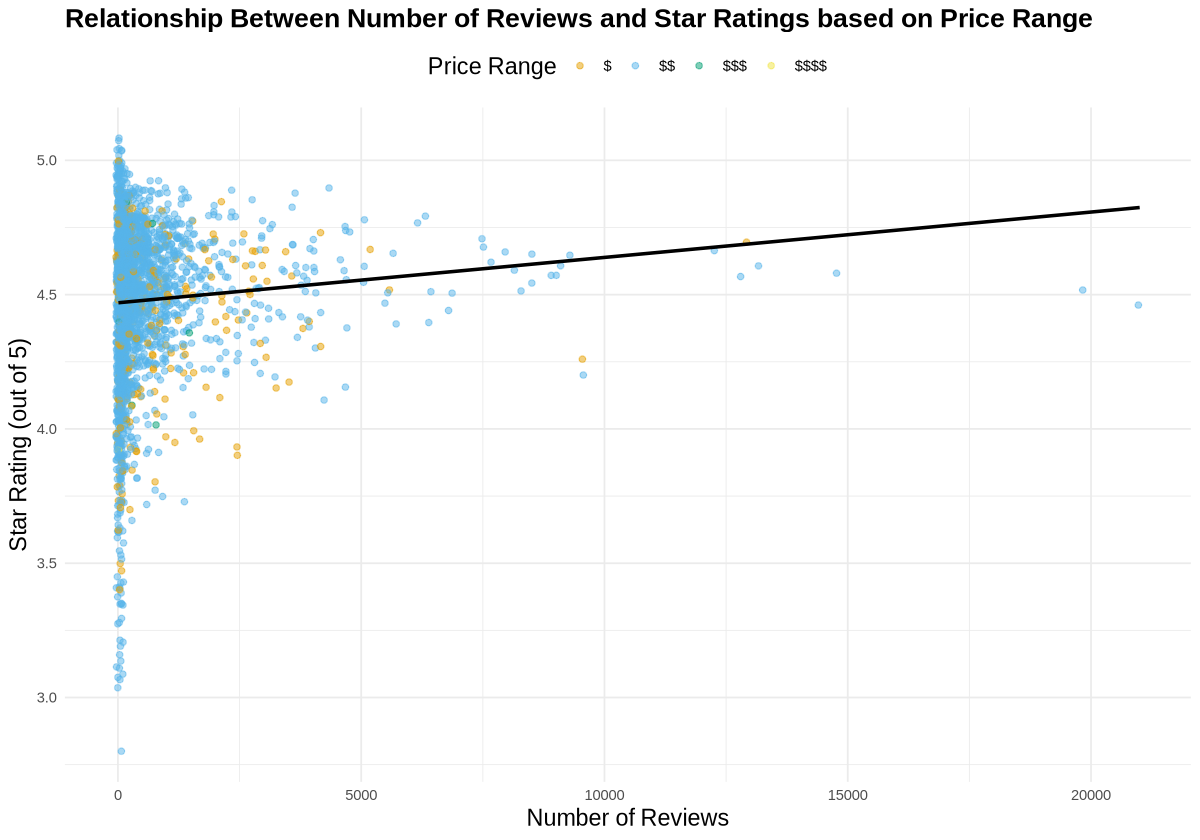

In [10]:
options(repr.plot.width = 10, repr.plot.height = 7)

plot <- ggplot(doordash_data_final, aes(x = num_reviews, y = star, color = price_range)) +
        geom_jitter(alpha = 0.5, width = 50, height = 0.1) +
        labs(title = "Relationship Between Number of Reviews and Star Ratings based on Price Range",
            x = "Number of Reviews",
            y = "Star Rating (out of 5)",
            color = "Price Range") +
        theme_minimal()+
        theme(plot.title = element_text(size = 16, face = "bold"),  
            axis.title = element_text(size = 14),
            legend.title = element_text(size = 14),
             legend.position = "top") +
        scale_color_manual(values = c("#E69F00", "#56B4E9", "#009E73", "#F0E442")) +
        geom_smooth(method = "lm", se = FALSE, color = "black") 

plot

The scatter plot reveals a slight positive correlation between the number of reviews and star ratings, suggesting that restaurants with more
reviews tend to maintain higher ratings. However, the effect is weak, as most ratings remain clustered between 4.0 and 5.0, with very few
falling below 3.0, indicating generally favorable customer satisfaction.

Price range does not appear to significantly influence ratings, as all pricing categories exhibit similar distributions. Most restaurants have fewer than 500 reviews, with only a few outliers receiving exceptionally high numbers.

Overall, while having a higher number of reviews may slightly associated with better ratings, pricing is not a strong factor in determining customer satisfaction. Highly-rated restaurants may naturally attract more reviews, reinforcing this observed correlation. Aspects like restaurant location, service quality, and promotions may also impact ratings but are not accounted for in this visualization.

`geom_smooth()` using formula = 'y ~ x'


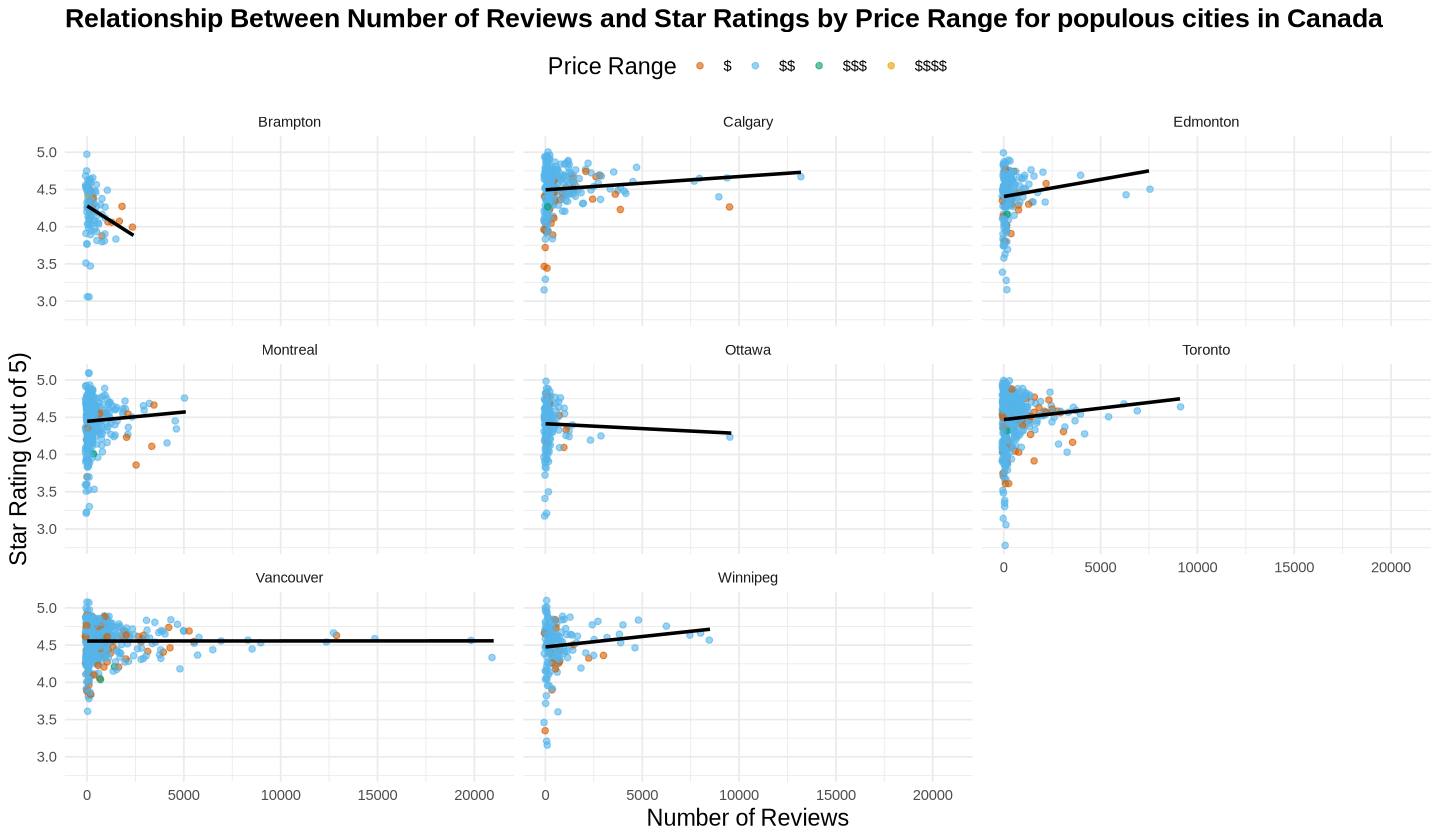

In [11]:
options(repr.plot.width = 12, repr.plot.height = 7)

plot1 <- ggplot(doordash_data_final, aes(x = num_reviews, y = star)) +
    geom_jitter(aes(color = price_range), alpha = 0.6, width = 100, height = 0.1) + 
    labs(title = "Relationship Between Number of Reviews and Star Ratings by Price Range for populous cities in Canada",
        x = "Number of Reviews",
        y = "Star Rating (out of 5)",
        color = "Price Range") +
    theme_minimal() +
    theme(plot.title = element_text(size = 16, face = "bold"),  
        axis.title = element_text(size = 14),
        legend.title = element_text(size = 14),
         legend.position = "top") +
    scale_color_manual(values = c("#D55E00", "#56B4E9", "#009E73", "#E69F00")) +
    geom_smooth(method = "lm", se = FALSE, color = "black") +
    facet_wrap(~city)

plot1

The plot builds upon the first visualisation by examining the number of reviews and star ratings across different cities in Canada, while also
differentiating price ranges. Each city is presented in a separate facet, allowing for a direct comparison of regional trends.

- Across all cities, restaurants with fewer reviews exhibit a wider range of ratings, while those with many reviews tend to cluster around higher star ratings.
- The trend lines suggest a slight positive correlation between the number of reviews and star ratings in most cities, indicating that popular restaurants generally maintain good ratings.
- Price range does not show a strong direct impact on ratings, but mid-range restaurants ($$) dominate across cities.
- Some cities, like Ottawa and Vancouver, display a nearly flat trend, suggesting that review count does not significantly impact average
- The variability in Brampton and Edmonton suggests a more pronounced effect of reviews on ratings compared to other cities.

Just as in the first plot, the price range of a restaurant does not appear to play a significant role in determining ratings, as similar rating distributions are observed across price categories but regional variations suggest that review count influences ratings differently across cities, making it a crucial factor to explore further.

### 4. Methods and Plan
**Method: Multiple Linear Regression**

_Initial Variable Preselection:_
The following variables were exculded:
- `...1` and `url`: Irrelevant for analysis; ...1 is just an index, and url is only a hyperlink with no predictive value.
- `restaurant`: Not used since it's a unique identifier and doesn’t contribute to generalizable insights.
- `category_1` and `category_2`: Excluded due to high cardinality (274 and 262 unique values respectively), making them unsuitable for regression without overfitting or losing interpretability.


##### _Forward Selection (AIC-Based)_

To guide variable inclusion in the final model, we used forward selection based on the Akaike Information Criterion (AIC). This method starts with a null model and iteratively adds variables that most reduce the AIC, helping balance model fit and complexity.

In [12]:
doordash_data_final <- doordash_data_final %>%
    select(-c(restaurant, category_1, category_2))

In [13]:
library(MASS)
mod_null <- lm(star ~ 1, data = doordash_data_final)
mod_full <- lm(star ~ ., data = doordash_data_final)
step_forward <- stepAIC(mod_null,
                        direction = "forward",
                        scope = list(lower = mod_null, upper = mod_full))
summary(step_forward)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=-6700.13
star ~ 1

              Df Sum of Sq    RSS     AIC
+ city         7   11.8952 191.03 -6844.4
+ price_range  3    2.7818 200.15 -6730.3
+ num_reviews  1    1.2221 201.71 -6714.0
+ distance     1    0.2636 202.67 -6701.5
<none>                     202.93 -6700.1

Step:  AIC=-6844.4
star ~ city

              Df Sum of Sq    RSS     AIC
+ price_range  3   2.97346 188.06 -6879.5
+ num_reviews  1   0.42490 190.61 -6848.2
<none>                     191.03 -6844.4
+ distance     1   0.06422 190.97 -6843.3

Step:  AIC=-6879.5
star ~ city + price_range

              Df Sum of Sq    RSS     AIC
+ num_reviews  1   0.56291 187.50 -6885.4
<none>                     188.06 -6879.5
+ distance     1   0.07124 187.99 -6878.5

Step:  AIC=-6885.35
star ~ city + price_range + num_reviews

           Df Sum of Sq    RSS     AIC
<none>                  187.50 -6885.4
+ distance  1   0.04887 187.45 -6884.0



Call:
lm(formula = star ~ city + price_range + num_reviews, data = doordash_data_final)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69281 -0.11891  0.04042  0.18266  0.75867 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.129e+00  3.087e-02 133.763  < 2e-16 ***
cityCalgary      2.731e-01  3.082e-02   8.860  < 2e-16 ***
cityEdmonton     1.891e-01  3.264e-02   5.794 7.68e-09 ***
cityMontreal     2.148e-01  2.987e-02   7.193 8.26e-13 ***
cityOttawa       1.713e-01  3.381e-02   5.068 4.29e-07 ***
cityToronto      2.507e-01  2.895e-02   8.659  < 2e-16 ***
cityVancouver    3.180e-01  2.916e-02  10.908  < 2e-16 ***
cityWinnipeg     2.568e-01  3.384e-02   7.588 4.50e-14 ***
price_range$$    1.121e-01  1.751e-02   6.400 1.84e-10 ***
price_range$$$   1.909e-02  7.624e-02   0.250  0.80236    
price_range$$$$ -1.049e-01  1.908e-01  -0.550  0.58240    
num_reviews      1.166e-05  4.168e-06   2.798  0.00518 ** 
---
Signif. codes:  0 ‘**

#### Interpretation of Forward selection
Forward selection resulted in a final model with:

`city`, `price_range` and `num_reviews`.

These were added in that order because each provided a meaningful drop in AIC when included.

#### AIC Progression:
- Start (null model): AIC = -6700.13
- After adding city: AIC = -6844.4
- After adding price_range: AIC = -6879.5
- After adding num_reviews: AIC = -6885.4
- Adding distance after that increased AIC to -6884.0, so it was not included.

This shows that adding more predictors beyond the three selected did not improve the model enough to justify their inclusion. Forward selection automatically stops when no remaining variables lead to a lower AIC.

From the summary of the final model: All cities have significant effects on the star rating compared to the baseline level (likely the first alphabetically). Most price ranges (especially `$$` and `$$$`) are significant predictors. num_reviews is also statistically significant (p-value = 0.00518).

To investigate the association between customer ratings and restaurant characteristics, we will use multiple linear regression with the following variables:

- **Response Variable (Y)**: `star` — average customer rating (continuous).
- **Explanatory Variables (X)**: `num_reviews` (continuous), `city` (categorical), and `price_range` (categorical).

$$
\text{star}_i = \beta_0 + \beta_1(\text{num\_reviews}_i) + \beta_2(\text{city}_i) + \beta_3(\text{price\_range}_i) + \varepsilon_i
$$

#### Reason for choosing this method

**Why is this method appropriate?**

Multiple linear regression is suitable because:

- Our response variable (`star`) is continuous.  
- We want to quantify associations between ratings and predictors like review count, city, and price range.  
- The method accommodates both continuous (`num_reviews`) and categorical (`city`, `price_range`) variables.  
- It provides an interpretable model for understanding the effect of each variable, controlling for others.

**Which assumptions are required, if any, to apply the method selected?**

To apply this model, we assume:

- **Linearity** — Relationship between predictors and `star` is linear.  
- **Independence** — Observations (restaurants) are independent.  
- **Homoscedasticity** — Residuals have constant variance.  
- **Normality** — Residuals are approximately normally distributed.  
- **No multicollinearity** — Predictors are not highly correlated with each other.  

These assumptions will be assessed using residual plots, diagnostic tests, and VIF checks.

**What are the potential limitations or weaknesses of the method selected?**

- The model assumes linear relationships, which may not fully capture real-world complexity.  
- Excluded variables like food quality or delivery time could be important but are not in the dataset.  
- High imbalance in review counts or city sizes may affect model reliability.  
- Categorical variables like `city` and `price_range` may group together diverse restaurant types.


### 5. Computational Code and Output


**a) and b) Write a computation code to implement the method proposed in part (1)**

In [14]:
model <- lm(star ~ num_reviews + city + price_range, data = doordash_data_final)
summary(model)


Call:
lm(formula = star ~ num_reviews + city + price_range, data = doordash_data_final)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.69281 -0.11891  0.04042  0.18266  0.75867 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.129e+00  3.087e-02 133.763  < 2e-16 ***
num_reviews      1.166e-05  4.168e-06   2.798  0.00518 ** 
cityCalgary      2.731e-01  3.082e-02   8.860  < 2e-16 ***
cityEdmonton     1.891e-01  3.264e-02   5.794 7.68e-09 ***
cityMontreal     2.148e-01  2.987e-02   7.193 8.26e-13 ***
cityOttawa       1.713e-01  3.381e-02   5.068 4.29e-07 ***
cityToronto      2.507e-01  2.895e-02   8.659  < 2e-16 ***
cityVancouver    3.180e-01  2.916e-02  10.908  < 2e-16 ***
cityWinnipeg     2.568e-01  3.384e-02   7.588 4.50e-14 ***
price_range$$    1.121e-01  1.751e-02   6.400 1.84e-10 ***
price_range$$$   1.909e-02  7.624e-02   0.250  0.80236    
price_range$$$$ -1.049e-01  1.908e-01  -0.550  0.58240    
---
Signif. codes:  0 ‘**

**c) Use *only one* visualization or table to report results.**

The code fits a regression model and calculates the absolute difference between predicted and actual ratings. A histogram visualizes these errors, with a red line showing the mean error to assess overall model accuracy.

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


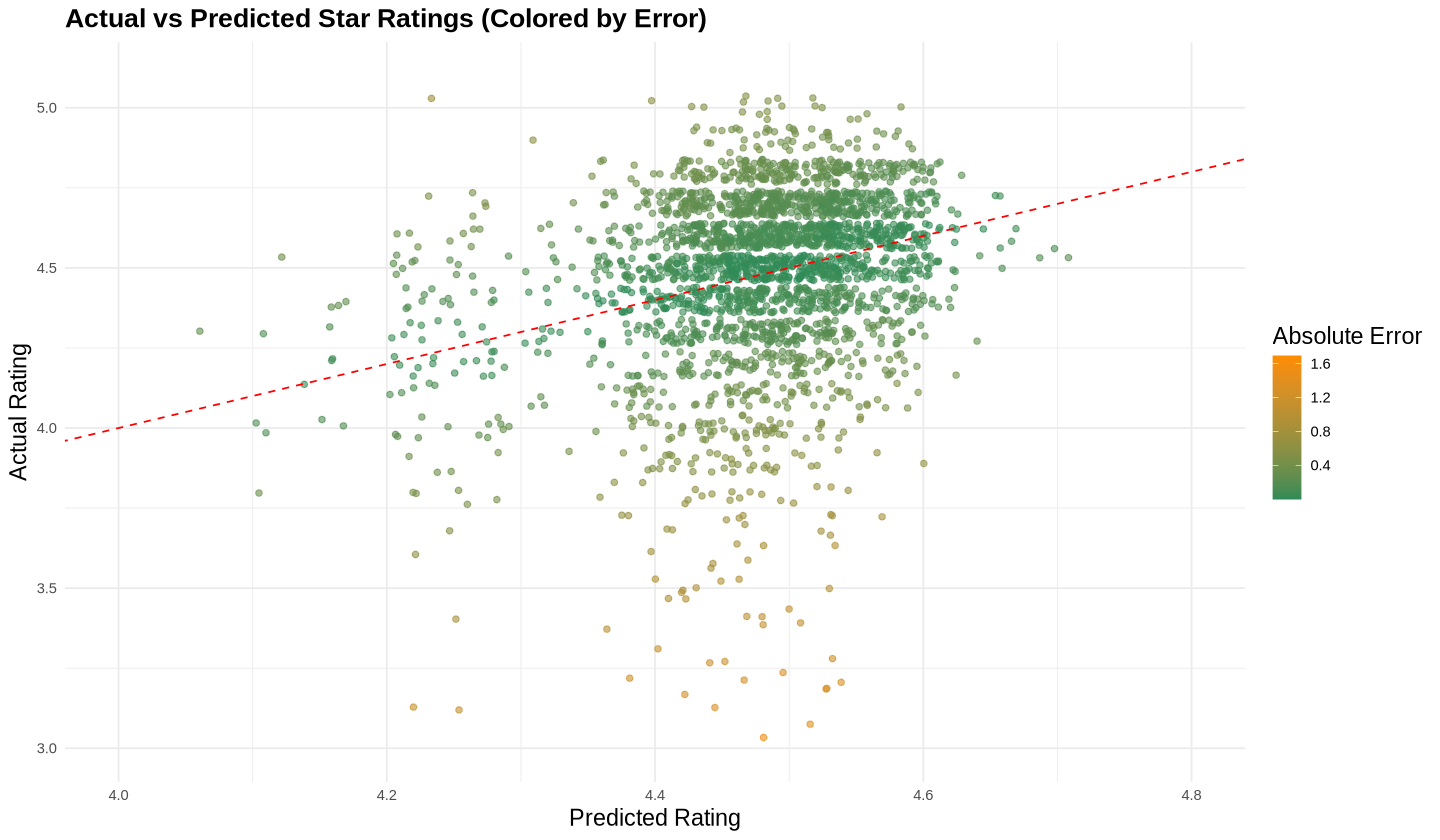

In [15]:
doordash_data_final <- doordash_data_final %>%
    mutate(predicted_star = predict(model),
    abs_error = abs(predicted_star - star))

plot2 <- ggplot(doordash_data_final, aes(x = predicted_star, y = star)) +
        geom_jitter(aes(color = abs_error), width = 0.04, height = 0.04, size = 1.5, alpha = 0.6) +
        geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
        scale_color_gradient(low = "#2E8B57", high = "#FF8C00") +
        scale_x_continuous(limits = c(4.0, 4.8)) +
        scale_y_continuous(limits = c(3.0, 5.1)) +
        labs(title = "Actual vs Predicted Star Ratings (Colored by Error)",
             x = "Predicted Rating",
             y = "Actual Rating",
             color = "Absolute Error") +
        theme_minimal() +
        theme(plot.title = element_text(face = "bold", size = 16),
        legend.title = element_text(size = 14),
        axis.title = element_text(size = 14))
plot2

The code fits a regression model and calculates the absolute error between predicted and actual star ratings. A scatter plot displays the relationship, with points color-coded by error size and jittered for visibility. A red dashed line indicates perfect prediction to help assess model fit.

**d)** The plot shows that most predicted ratings fall between 4.2 and 4.6, with actual ratings ranging more widely from 3.0 to 5.0. A large portion of the points are green, indicating small absolute errors under 0.4, while the mean error from earlier analysis is approximately 0.24. However, visible orange points below the red line highlight underpredictions, especially for restaurants with actual ratings below 4.0, suggesting the model struggles to capture lower ratings. These results are mostly as expected and show that variables like number of reviews, city, and price range explain part of the variation in ratings, but the model’s limited predictive range reduces its ability to fully answer the research question.

### Resources

1. **Dataset Source:**
   - Kaggle. (n.d.). *Food Delivery in Canada - DoorDash*. Retrieved from [https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash](https://www.kaggle.com/datasets/satoshiss/food-delivery-in-canada-door-dash)

2. **Programming & Libraries:**
   - Wickham, H., et al. (2019). *ggplot2: Elegant Graphics for Data Analysis*. Springer-Verlag. [https://ggplot2.tidyverse.org](https://ggplot2.tidyverse.org)
   - Wickham, H., François, R., Henry, L., & Müller, K. (2023). *dplyr: A Grammar of Data Manipulation*. R package version 1.1.2. [https://CRAN.R-project.org/package=dplyr](https://CRAN.R-project.org/package=dplyr)
   - R Core Team. (2023). *R: A language and environment for statistical computing*. R Foundation for Statistical Computing, Vienna, Austria. [https://www.R-project.org/](https://www.R-project.org/)

3. **Statistical & Data Science References:**
   - Baumer, B., Kaplan, D., & Horton, N. J. (2021). *ModernDive: Statistical Inference via Data Science*. Retrieved from [https://moderndive.com/2-viz.html](https://moderndive.com/2-viz.html)
   - Peng, R. D., & Matsui, E. (2016). *Data Science: A First Introduction to R*. Retrieved from [https://datasciencebook.ca/wrangling.html](https://datasciencebook.ca/wrangling.html)